# ***1--IMPORT LIBRARY***

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input/online-retail'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-retail/Online Retail.xlsx


# ***2--READ DATA_SET_EXCELSHEET***

In [3]:
df = pd.read_excel("/kaggle/input/online-retail/Online Retail.xlsx")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# ***3-information of The dataset***

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# ***4- preprocessing of the data***¶


In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Handle missing values
df.dropna(inplace=True)

In [8]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
# Create a new column for Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [10]:
# Total sales by country
total_sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()
print(total_sales_by_country)

                 Country   TotalPrice
0              Australia   137009.770
1                Austria    10154.320
2                Bahrain      548.400
3                Belgium    40910.960
4                 Brazil     1143.600
5                 Canada     3666.380
6        Channel Islands    20076.390
7                 Cyprus    12858.760
8         Czech Republic      707.720
9                Denmark    18768.140
10                  EIRE   250001.780
11    European Community     1291.750
12               Finland    22326.740
13                France   196626.050
14               Germany   221509.470
15                Greece     4710.520
16               Iceland     4310.000
17                Israel     6988.400
18                 Italy    16890.510
19                 Japan    35340.620
20               Lebanon     1693.880
21             Lithuania     1661.060
22                 Malta     2505.470
23           Netherlands   284661.540
24                Norway    35163.460
25          

In [11]:
december_sales = df[(df['InvoiceDate'].dt.month == 12) & (df['InvoiceDate'].dt.year == 2010)]
print(december_sales)

      InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
42448    539988     84380    SET OF 3 BUTTERFLY COOKIE CUTTERS         1   
42449    539988    84849D                HOT BATHS SOAP HOLDER         1   
42450    539988    84849B               FAIRY SOAP SOAP HOLDER         1   
42451    539988     22854          CREAM SWEETHEART EGG HOLDER         2   
42452    539988    47559B                  TEA TIME OVEN GLOVE         2   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0     20

# ***5- Visualizing data¶***

/tmp/ipykernel_24/554869230.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()


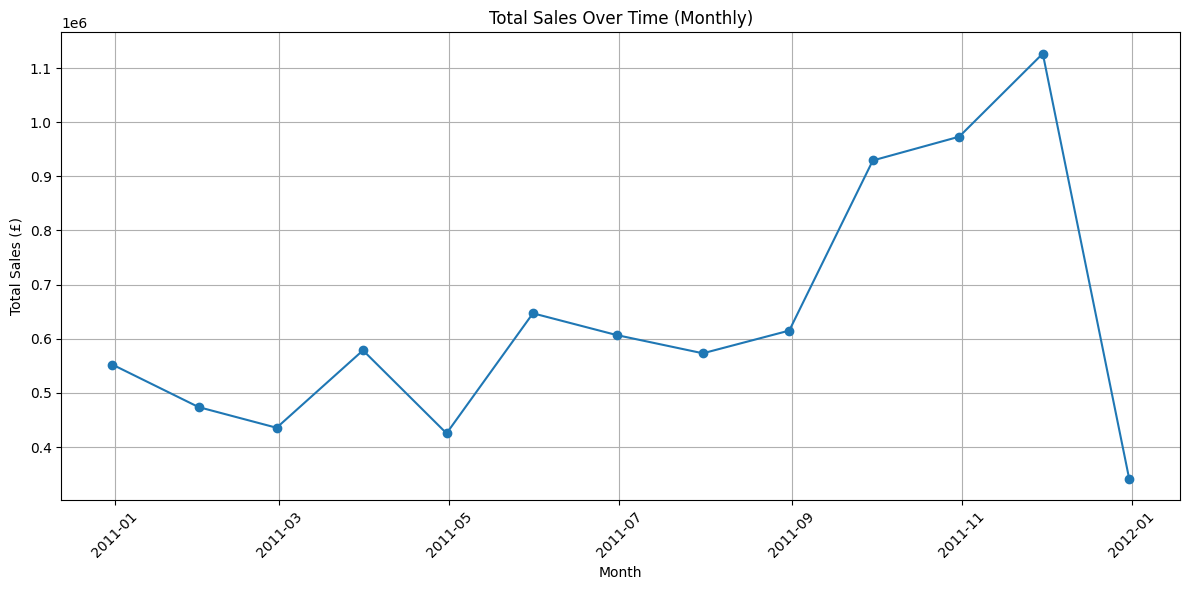

In [12]:
monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

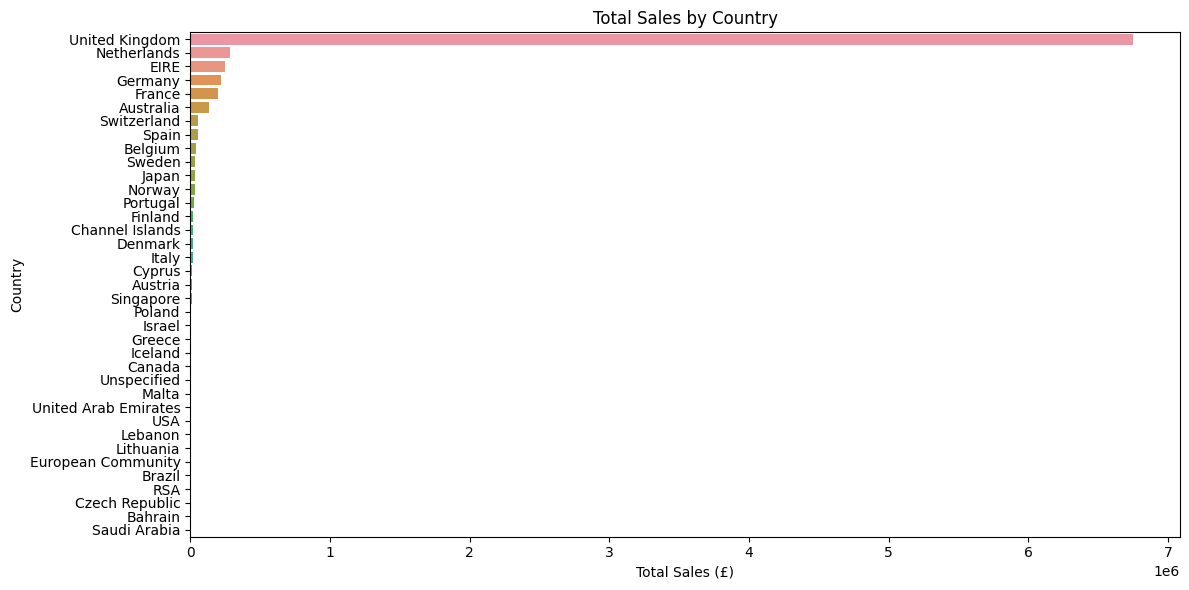

In [13]:
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPrice', y='Country', data=country_sales.sort_values('TotalPrice', ascending=False))
plt.title('Total Sales by Country')
plt.xlabel('Total Sales (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

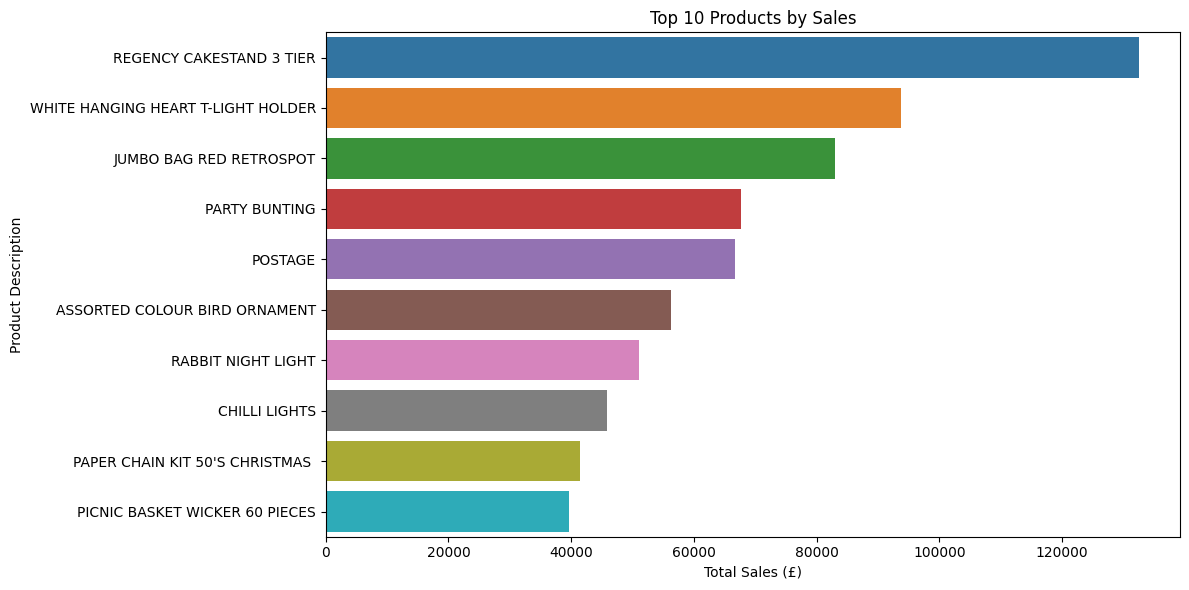

In [14]:
top_products = df.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPrice', y='Description', data=top_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


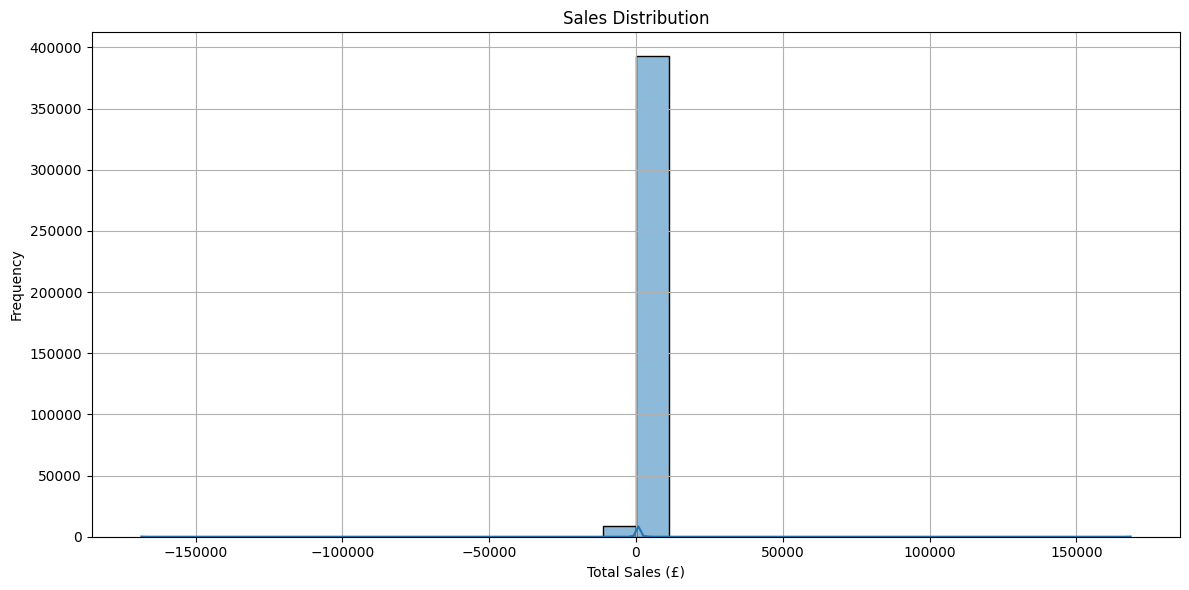

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPrice'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Total Sales (£)')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

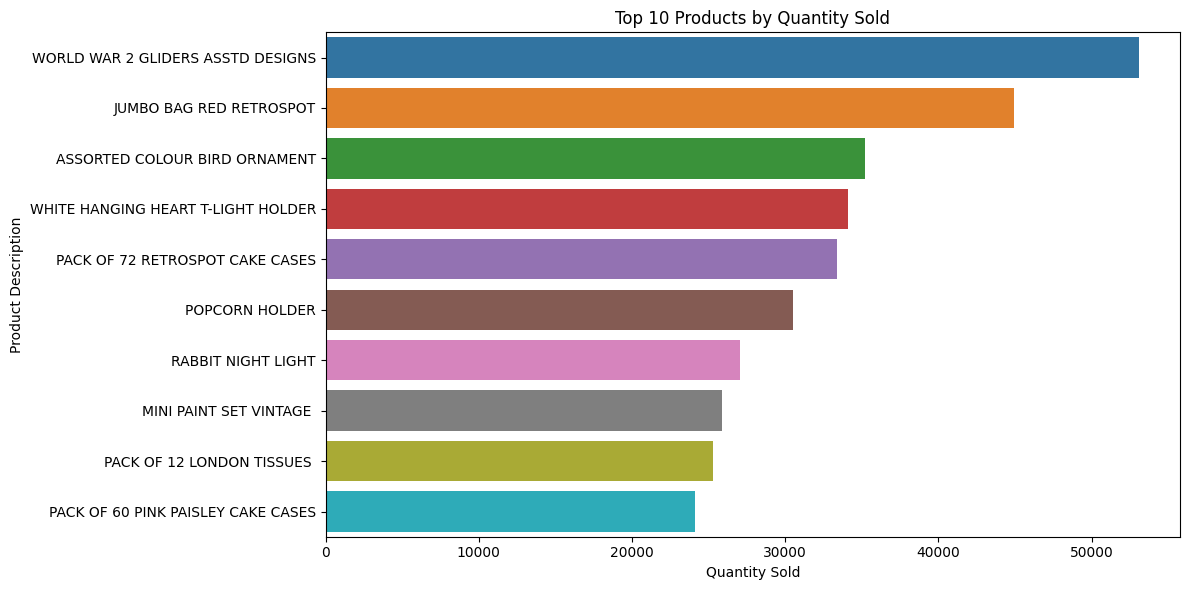

In [16]:
quantity_sold = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=quantity_sold)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

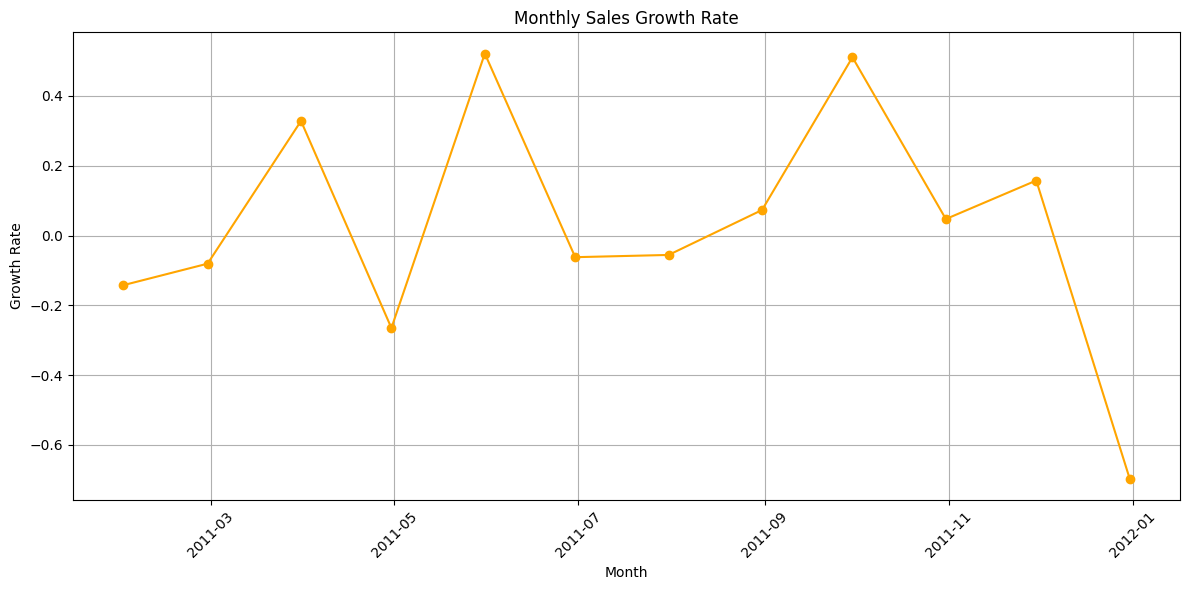

In [17]:
monthly_sales_growth = monthly_sales.pct_change().dropna()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_growth.index, monthly_sales_growth.values, marker='o', color='orange')
plt.title('Monthly Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

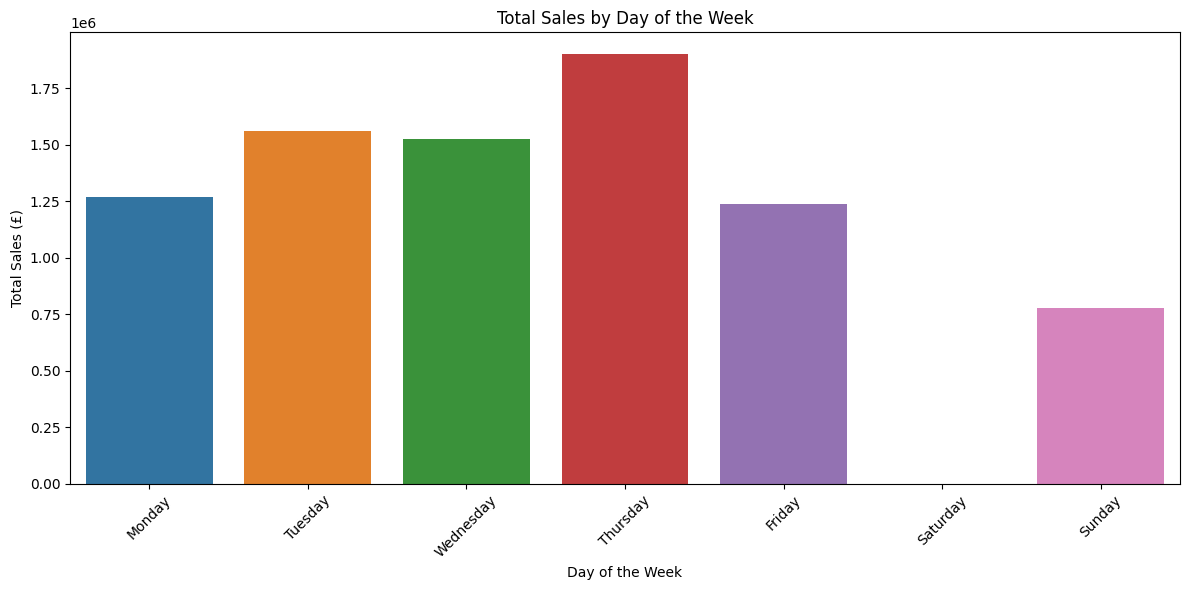

In [18]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

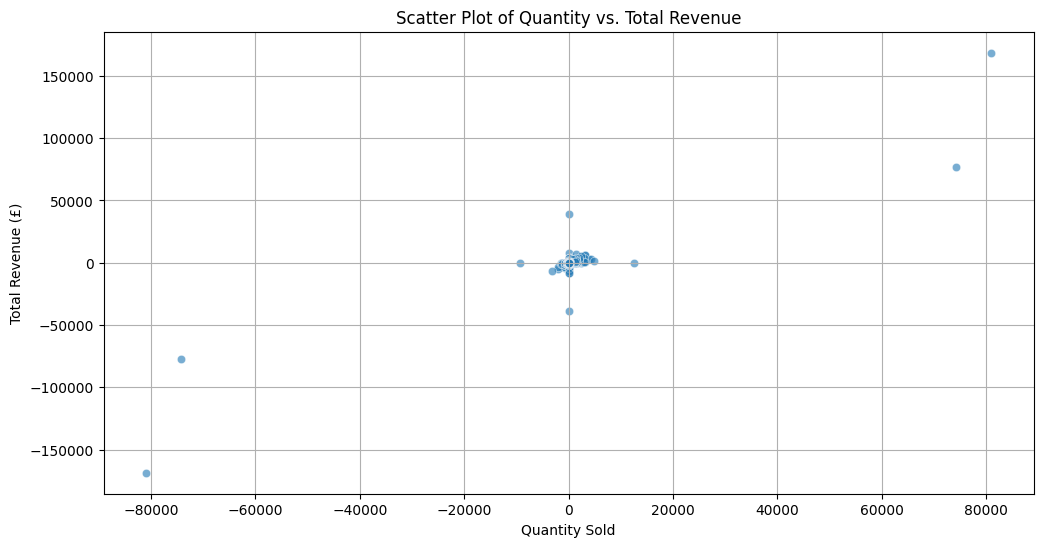

In [20]:
# 2. Scatter Plot of Quantity vs. Total Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='TotalRevenue', data=df, alpha=0.6)
plt.title('Scatter Plot of Quantity vs. Total Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Revenue (£)')
plt.grid()
plt.show()

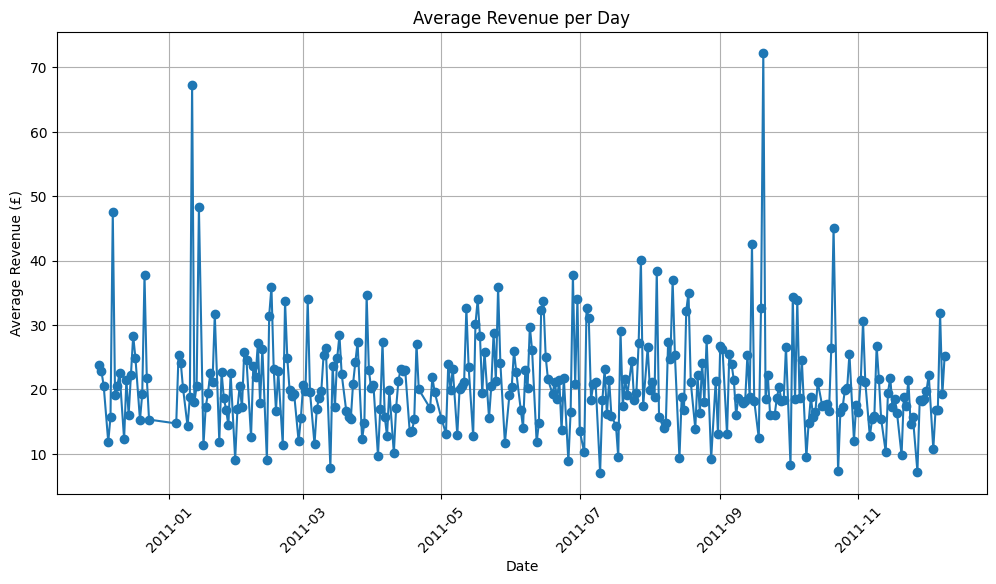

In [21]:
# 3. Line Plot of Average Revenue per Day
average_revenue_per_day = df.groupby(df['InvoiceDate'].dt.date)['TotalRevenue'].mean()
plt.figure(figsize=(12, 6))
average_revenue_per_day.plot(kind='line', marker='o')
plt.title('Average Revenue per Day')
plt.xlabel('Date')
plt.ylabel('Average Revenue (£)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


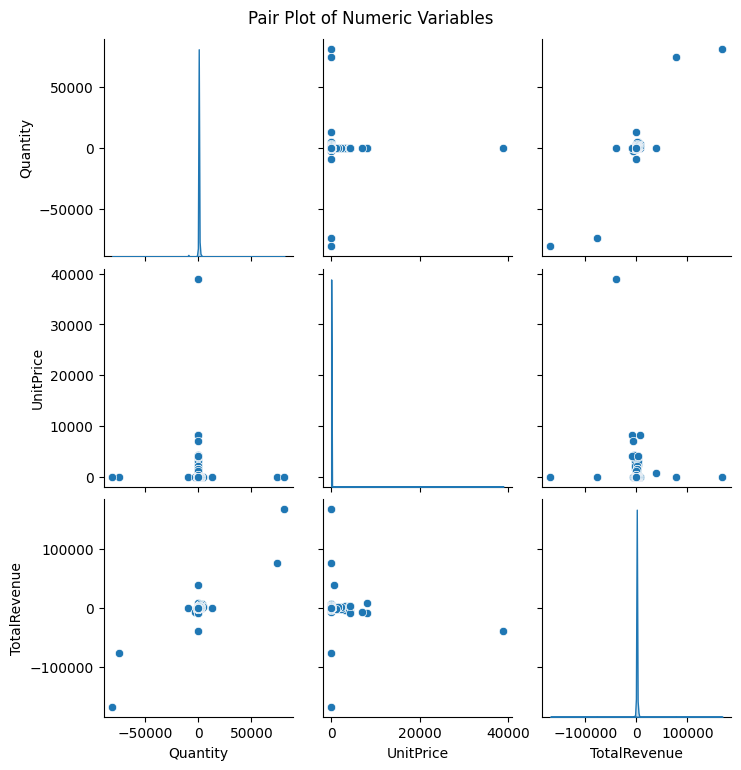

In [22]:
# 5. Pair Plot for Numeric Variables
sns.pairplot(df[['Quantity', 'UnitPrice', 'TotalRevenue']], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

# ***6-Feature Engineering***

In [23]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

 # ***8-Select relevant features***

In [24]:
features = df[['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'DayOfWeek']]
target = df['TotalPrice']

# ***Data Splitting***

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# ***models***

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Histogram-based Gradient Boosting": HistGradientBoostingRegressor(random_state=42)
}

# ***training the models***

In [28]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}

In [29]:
# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: Mean Squared Error = {metrics['MSE']:.2f}, R^2 Score = {metrics['R^2']:.2f}")

Linear Regression: Mean Squared Error = 187102.07, R^2 Score = 0.74
Ridge Regression: Mean Squared Error = 187102.07, R^2 Score = 0.74
Lasso Regression: Mean Squared Error = 187103.77, R^2 Score = 0.74
Decision Tree: Mean Squared Error = 210825.86, R^2 Score = 0.70
Random Forest: Mean Squared Error = 356667.27, R^2 Score = 0.50
Gradient Boosting: Mean Squared Error = 228123.82, R^2 Score = 0.68
AdaBoost: Mean Squared Error = 213465.49, R^2 Score = 0.70
Histogram-based Gradient Boosting: Mean Squared Error = 705346.95, R^2 Score = 0.01


# ***ploting the output***

                                             MSE       R^2
Linear Regression                  187102.068894  0.737901
Ridge Regression                   187102.068931  0.737901
Lasso Regression                   187103.768790  0.737899
Decision Tree                      210825.862331  0.704668
Random Forest                      356667.270889  0.500369
Gradient Boosting                  228123.818859  0.680437
AdaBoost                           213465.489905  0.700970
Histogram-based Gradient Boosting  705346.947059  0.011926


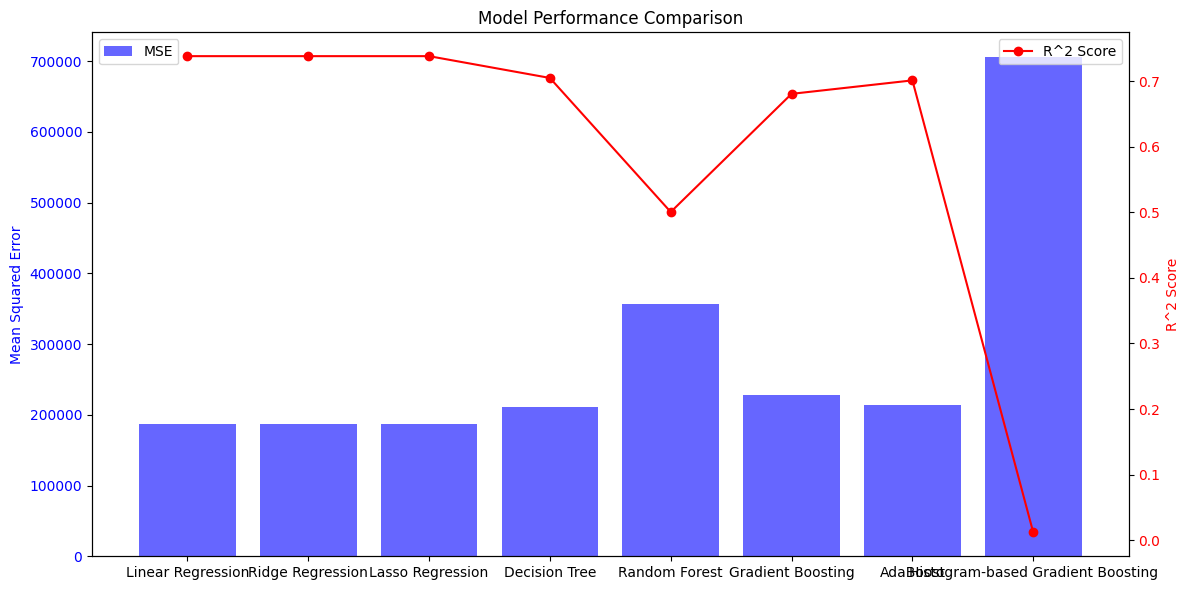

In [30]:
results_df = pd.DataFrame(results).T
print(results_df)

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MSE
ax1.bar(results_df.index, results_df['MSE'], color='b', alpha=0.6, label='MSE', r)
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for R^2
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['R^2'], color='r', marker='o', label='R^2 Score')
ax2.set_ylabel('R^2 Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding titles and legends
plt.title('Model Performance Comparison')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# ***Thank you***